## Intro to pandas

What is pandas??? "pan"nel "da"ta "s"tructures. Powerfull, intuitive, data analysis
tool. This package convinced me to learn and start to use python as a research tool
Developed at [AQR](https://www.aqr.com/) (a quantative hedgfund) by [Wes Mckinney](http://wesmckinney.com). They made it open source
and quickly expanded developed and became widely used. 


First we need to import the pandas package...very simmilar to when we imported
our functions, but this is a MUCH larger. Further more, this is what makes pandas
a higher-level addon to python. That is at a lower level the objects, methods, functions...
are already created for us, then when we import pandas they are ready to go.

In [2]:
import pandas as pd

This says import the package pandas then the "as pd" says call it pd (our alias)
this just simplifies our life without having to always be typing pandas, we just
type `pd`. IF your lost on this, go back to our chapter on [importing packages](https://nyudatabootcamp.gitbooks.io/data-bootcamp/content/packages.html)

Lets first create some data...

In [39]:
data = {"GDP": [5974.7, 10031.0, 14681.1],
                   "CPI": [127.5, 169.3, 217.488],
                   "Year": [1990, 2000, 2010],
                   "Country": ["US", "US", "US"]}
# what kind of data structure is this

print(type(data))

<class 'dict'>


It should tells us that it is a dictionary, with keys and values (which are lists). How do we get those?

Now we are going to convert the type of data to a "DataFrame" this is the key oject within pandas. (If familiar with R this is simmilar to their dataframe)


In [40]:
df = pd.DataFrame(data)

In [5]:
print("\n", type(df))

# Now lets see how cool this is, return to the original data and lets look at it
print(data)


 <class 'pandas.core.frame.DataFrame'>
{'Year': [1990, 2000, 2010], 'CPI': [127.5, 169.3, 217.488], 'GDP': [5974.7, 10031.0, 14681.1], 'Country': ['US', 'US', 'US']}


In [6]:
data

{'CPI': [127.5, 169.3, 217.488],
 'Country': ['US', 'US', 'US'],
 'GDP': [5974.7, 10031.0, 14681.1],
 'Year': [1990, 2000, 2010]}

In [7]:
df

,CPI,Country,GDP,Year
0,127.500,US,5974.7,1990
1,169.300,US,10031.0,2000
2,217.488,US,14681.1,2010


This lays out the data in a very intuitive way, columns defined by the keys...
values as rows...literally like an excel file. Amazing. You may be thinking...
so what, well there is a reason why excel is popular, it is natural for people
do think about data in a table like formate, a dataframe is always going to 
present this in this intuitive, natural way. This is also important because it
helps us visualize and then implement calculations, operations, on the table. 
Where as this could be very hard to do in the data variable above.

In python remember the datafame is an object and with that object comes methods and attributes (we have seen less attributes, but lots of methods)


In [8]:
print(df.shape) 
# Note that this is an attribute not a method as the method 
# takes in arguments through () where as this just asks what is the shape of df

(3, 4)


In [9]:
print(df.columns) # which returns an object...but we can get it to a list.
print(df.columns.tolist())

Index(['CPI', 'Country', 'GDP', 'Year'], dtype='object')
['CPI', 'Country', 'GDP', 'Year']


In [10]:
print(df.index) # which is like a range type, but within pandas...
print(df.index.tolist())

RangeIndex(start=0, stop=3, step=1)
[0, 1, 2]


In [11]:
print(df.dtypes) # this is an attribute on the dataframe, simmilar to type

CPI        float64
Country     object
GDP        float64
Year         int64
dtype: object


So this is interesting, for the numerical values it says that they are flaoting
point vlaues, that is great. For the names, strings, it says that they are objects
NOT stings? Pandas does this (i) if all the data in a column is a number, then 
it is recognized as a number (ii) if not, then it is just going to be an object

**Exercises** Consider the following data below:

In [35]:
pwt_data = {'countrycode': ['CHN', 'CHN', 'CHN', 'FRA', 'FRA', 'FRA'],
        'pop': [1124.8, 1246.8, 1318.2, 58.2, 60.8, 64.7],
        'rgdpe': [2.611, 4.951, 11.106, 1.294, 1.753, 2.032],
        'year': [1990, 2000, 2010, 1990, 2000, 2010]}

pwt = pd.DataFrame(pwt_data)

* What are the dimensions of pwt?
* What dtypes are the variables? What do they mean?
* What does pwt.columns.tolist() do? How does it compare to list(pwt)?
* Challenging. What is list(pwt)[0]? Why? What type is it?
* Challenging. What would you say is the natural index? How would you set it?

Below is an example of setting the index. This is a feature that I'm slowing starting to embrace. The idea essentially, is that by setting the index, then we can use the `.loc` or location finding command to pull out only specific entries on a row. For example, if we only want year 2000, then we 
- set the index to be the year
- then use `.loc` to pull out that particular year.

How you would you do this for the country. Same idea, not that we set the index to countrycode, then select the county code that we want. 

Two more points about this:
- One is that we can multi-index, that is have layers of indexes...why would we want to do this. This relates to the question of the "natural index"...

I would argue the natural index would be on the level of an observation. What does that mean? Think about the data set above, what is an observation look like and what are the variables associated with it. Here an observation is a country time pair. Note an observation is two dimensions a country at a particular time. Then the variables associated with each observation are population, gdp. Back to the natural index, given this argument above, I would actually say that it is a multi index with countries and years. 
- MTWN: This discussion relates to this concept of ["tidy data" which is discusses nicely here](http://vita.had.co.nz/papers/tidy-data.pdf).


In [36]:
pwt.set_index(["year"]).loc[2000]

#pwt.set_index(["year"], inplace = True)

#pwt.set_index(["countrycode","year"]).xs(2000, level = "year")


,countrycode,pop,rgdpe
year,,,
2000,CHN,1246.8,4.951
2000,FRA,60.8,1.753


In [37]:
pwt.set_index?

Why is the index back to the original...well its just like string methods, the original data frame is not fundamentally changed. To change it you need to either (i) assign the modified data frame either to itself or to a new name or (ii) use the inplace = True command where it does not create a new object, but directly creates the new index on the old object. 

### Calculations on a dataframe...

Below are a bunch of calculations. This is essentially, the "excel" functionality of the data frame. 

In [41]:
print(type(df["GDP"]))

# then it is easy to do optionation on a series...

print(df["GDP"] + df["GDP"])

print(df["GDP"] / df["CPI"]) # This would be real gdp

print(100*df["GDP"] / df["GDP"][0]) # what is this doing...if you remeber from EGB
# This is a way to index GDP by the first entry...

# Then it is super easy to create a new column based on an operation or existing
# columns, almost excel like...

df['RGDP'] = df['GDP']/df['CPI']

df['GDP_div_1000'] = df['GDP'] / 1000

print("\n",df) # so there is a new column called real gdp now...

# See the digressioini n the book....I don't mind doing this...

<class 'pandas.core.series.Series'>
0    11949.4
1    20062.0
2    29362.2
Name: GDP, dtype: float64
0    46.860392
1    59.249852
2    67.503035
dtype: float64
0    100.000000
1    167.891275
2    245.721124
Name: GDP, dtype: float64

        CPI Country      GDP  Year       RGDP  GDP_div_1000
0  127.500      US   5974.7  1990  46.860392        5.9747
1  169.300      US  10031.0  2000  59.249852       10.0310
2  217.488      US  14681.1  2010  67.503035       14.6811

 0    46.860392
1    59.249852
2    67.503035
Name: RGDP, dtype: float64


In [42]:
df

,CPI,Country,GDP,Year,RGDP,GDP_div_1000
0,127.500,US,5974.7,1990,46.860392,5.9747
1,169.300,US,10031.0,2000,59.249852,10.0310
2,217.488,US,14681.1,2010,67.503035,14.6811


Now how here is a way to grab several columns.

In [17]:
df[["CPI","GDP"]]

,CPI,GDP
0,127.500,5974.7
1,169.300,10031.0
2,217.488,14681.1


In [54]:
df.columns = ["cpi", "country", "gdp", "year", "rgdp", "gdp_div_1000"]
# What if the elelments here were less than the number of columns?

df.columns = [var.upper() for var in df.columns]
# HEre we can use list comprehension to change the neames in columns in the way
# we want...

df

,CPI,COUNTRY,GDP,YEAR,RGDP,GDP_DIV_1000
0,127.500,US,5974.7,1990,46.860392,5.9747
1,169.300,US,10031.0,2000,59.249852,10.0310
2,217.488,US,14681.1,2010,67.503035,14.6811


Another way to rename specific instances... not that if we did not have the df
in front, nothing would fundementally change, it would just copy and print out
the new one, but the saved df is the same...

In [55]:
df = df.rename(columns = {"GDP":"NGDP"})

df

,CPI,COUNTRY,NGDP,YEAR,RGDP,GDP_DIV_1000
0,127.500,US,5974.7,1990,46.860392,5.9747
1,169.300,US,10031.0,2000,59.249852,10.0310
2,217.488,US,14681.1,2010,67.503035,14.6811


In [56]:
namelist = ["NGDP","CPI"]

df[namelist]

,NGDP,CPI
0,5974.7,127.500
1,10031.0,169.300
2,14681.1,217.488


How do we remove stuff, well there is the `.drop` method

In [52]:
df.drop("CPI", axis = 1) 

,COUNTRY,NGDP,YEAR,RGDP,GDP_DIV_1000
0,US,5974.7,1990,46.860392,5.9747
1,US,10031.0,2000,59.249852,10.0310
2,US,14681.1,2010,67.503035,14.6811


In [53]:
df

,CPI,COUNTRY,NGDP,YEAR,RGDP,GDP_DIV_1000
0,127.500,US,5974.7,1990,46.860392,5.9747
1,169.300,US,10031.0,2000,59.249852,10.0310
2,217.488,US,14681.1,2010,67.503035,14.6811


- **Exercise.** For the DataFrame df, create a variable diff equal to the difference of ngdp and rgdp. Verify that diff is now in df.

- **Exercise.** How would you extract the variables ngdp and year? 

- **Exercise** How would you extract all variables for just one year, say 2000?

- **Exercise** How would you drop the variable diff? If you print your dataframe again, is it gone? If not, why do you think it is still there?

- **Exercise** How would you drop one year from the data set?

The key thing to recognize is the axis, this is saying drop a column named "CPI"
if you did this with out the axis it would give an error, why the defalut is 
axis = 0 which are rows...and there is no index named "CPI"

In [64]:
#df.drop(2, axis = 0)
# This will drop the index 2, row number 3 from the dataframe...
# Here is another way to see this...

df.set_index(["YEAR"]).drop(2000)

,CPI,COUNTRY,NGDP,RGDP,GDP_DIV_1000
YEAR,,,,,
1990,127.500,US,5974.7,46.860392,5.9747
2010,217.488,US,14681.1,67.503035,14.6811


### Output Data

We can output data in easy way as well with these commands. Note that it creates the file within your working directory unless you specify otherwise...

In [65]:
pwt.to_csv("pwt.csv")

pwt.to_excel("pwt.xlsx")

### Simple Statistics

Here are some simple commands that can report basic summary statistics of the data:

In [73]:
test = pd.DataFrame(df.mean())

test.loc["CPI"]

In [78]:
sumstate = df.describe() # This one creates a dataframe. Could grab what we want from there

In [79]:
type(sumstate)

pandas.core.frame.DataFrame

In [80]:
df


,CPI,COUNTRY,NGDP,YEAR,RGDP,GDP_DIV_1000
0,127.500,US,5974.7,1990,46.860392,5.9747
1,169.300,US,10031.0,2000,59.249852,10.0310
2,217.488,US,14681.1,2010,67.503035,14.6811


### Basic plotting

This is like, less than basic plotting. But with the dataframe, we can do some very "quick and dirty" things to help visualize the data. We will talk about more formal methods latter to create much more professional graphs.

In [ ]:
import matplotlib.pyplot as plt

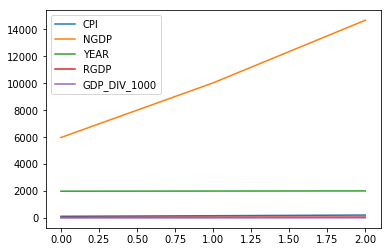

In [88]:
df.plot()

plt.show()

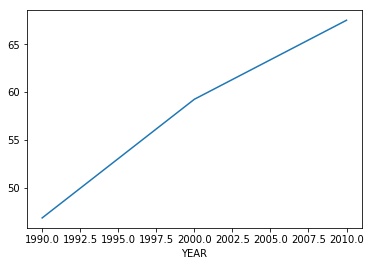

In [90]:
df.set_index("YEAR").RGDP.plot()

plt.show()

- **Exercise.** Compute the summary statistics (for the pwt data frame). Write these summary stats to an excel sheet. Can you do this only for China?

- **Exercise.** Produce a bar chart of gdp per capita for France where each bar is a different year.   (Hint: use the docstring for df.plot to see what kind argument does)

In [92]:
pwt.describe()

,pop,rgdpe
count,6.000000,6.000000
mean,645.583333,3.957833
std,643.107992,3.729953
min,58.200000,1.294000
25%,61.775000,1.822750
50%,594.750000,2.321500
75%,1216.300000,4.366000
max,1318.200000,11.106000


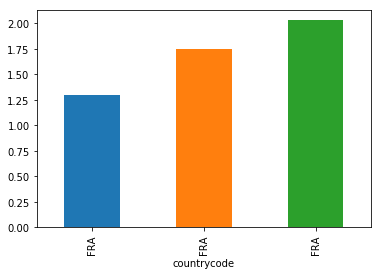

In [106]:
pwt.set_index("countrycode","year").loc["FRA"].rgdpe.plot(kind = "bar")



plt.show()